# STAT 301 Final Report

# Introduction: 


Coronary heart disease (CAD) is the leading cause of death in the United States (Menees & Bates, 2010), and the second leading cause of death in Canada (Public Health Agency of Canada, 2017). Typically, CAD is caused when plaque builds up in arteries, restricting blood flow (Menees & Bates, 2010). This causes an imbalance between the oxygen supply and demand of the heart, which often manifests as chest pain, also known as angina pectoris (Menees & Bates, 2010). While there are many precursors to CAD, including high cholesterol, tobacco use, and a family history of CAD (Menees & Bates, 2010), it is impossible to predict CAD using a single variable. For example, a resting electrocardiogram (ECG) is performed on all patients with suspected CAD, but a normal ECG does not exclude the patient from having CAD (Menees & Bates, 2010). Thus, due to the prevalence and severity of CAD, it is of keen interest to develop CAD probability models that can be universally applied to patients worldwide.

The dataset we used for our analysis is from Detrano et al. (1989), whose focus was also to generate a model to accurately predict the probability of CAD. The dataset includes clinical and test variables for 1025 patients from hospitals in Cleveland, Budapest, Zurich, Basel, and Long Beach (Detrano et al., 1989). These variables include the age of the patient (age), sex of the patient (sex), chest pain type (cp), resting blood pressure upon admission (trestbps), serum cholesterol (chol), if fasting blood sugar > 120 mg/dl (fbs), resting electrocardiographic results (restecg), maximum heart rate achieved (thalach), exercise-induced chest pain (exang), ST depression induced by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment (slope), the number of major vessels coloured by fluoroscopy (ca), if the patient has thalassemia (thal), and the presence of CAD (target).

# Question: 

Can we predict the presence of heart disease in a patient using either an easily measurable subset of variables (sex, chest pain type, age, resting blood pressure) or the full variable list by using different algorithm (forward/backward selection and LASSO).  

## (2) Methods and Results

### a) Exploratory Data Analysis (EDA)

In [4]:
# Main developer: Michelle H. 
# Contributor: Anna M. 

library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)
library(dplyr)
library(ggplot2)
library(cowplot)



# Loading in the dataset from Kaggle 
heart_MH <- read.csv("heart.csv")


#Checking for missing values 
sum(is.na(heart_MH))


#Number of rows (observations) within the set 
head(heart_MH)
nrow(heart_MH)

[1] 0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


[1] 1025

In [18]:
# Main developer: Anna M. 
# Contributor: Michelle H. 

# Convert categorical variables

heart_MH$sex <- as.factor(heart_MH$sex)
heart_MH$cp <- as.factor(heart_MH$cp)
heart_MH$fbs <- as.factor(heart_MH$fbs)
heart_MH$restecg <- as.factor(heart_MH$restecg) 
heart_MH$exang <- as.factor(heart_MH$exang) 
heart_MH$slope <- as.factor(heart_MH$slope) 
heart_MH$ca <- as.factor(heart_MH$ca) 
heart_MH$thal <- as.factor(heart_MH$thal) 
heart_MH$target <- as.factor(heart_MH$target)

# Rename columns for easier understanding
heart_data <- heart_MH %>% 
rename(chest_pain_type = cp, cholesterol = chol, resting_bp = trestbps, fasting_blood_sugar = fbs, resting_ecg = restecg, max_heart_rate = thalach, exercise_induced_angina = exang, ST_depression = oldpeak, vessels_num = ca)

head(heart_data)

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,ST_depression,slope,vessels_num,thal,target
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


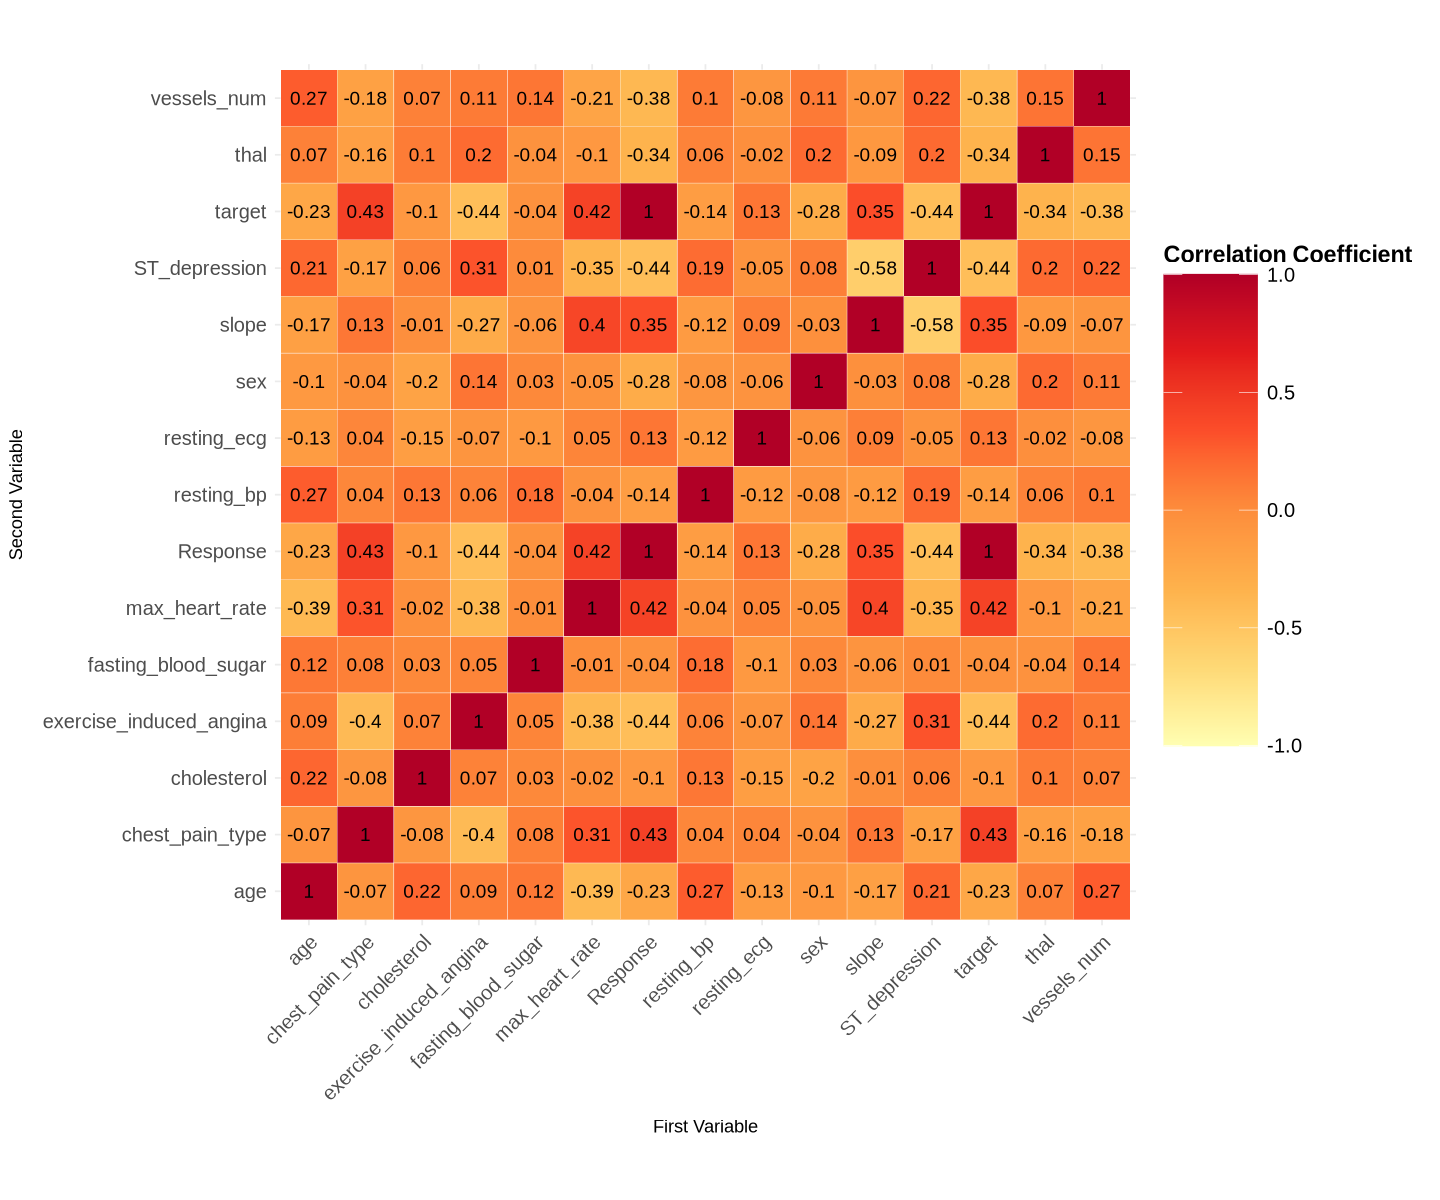

In [9]:
# Main developer: Vaibhav S.  
# Contributor: Michelle H., Anna M. 

#Correlation matrix 

corr_matrix_heart <- heart_data %>%
  mutate(Response = as.numeric(target)) %>%
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("variable1") %>%
  pivot_longer(-variable1, names_to = "variable2", values_to = "correlation")


# Plotting the correlation matrix
options(repr.plot.width = 12, repr.plot.height = 10)
plot_corr_matrix_heart <- corr_matrix_heart %>%
  ggplot(aes(x = variable1, y = variable2)) +
  geom_tile(aes(fill = correlation), color = "white") +
  scale_fill_distiller(name = "Correlation Coefficient",
                       palette = "YlOrRd",
                       direction = 1, limits = c(-1, 1)) +
  labs(x = "First Variable", y = "Second Variable") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),
        axis.text.y = element_text(size = 12),
        legend.title = element_text(size = 14, face = "bold"),
        legend.text = element_text(size = 12),
        legend.key.size = unit(2, "cm")) +
  coord_fixed() +
  geom_text(aes(label = round(correlation, 2)), color = "black", size = 4)

# Display the correlation matrix plot
plot_corr_matrix_heart

### Interpretation: 
There is no significant correlation between any of the variables. 

We will create a couple graphs to represent key relationships using selected variables in relation to the target variable. 

In [1]:
library(ggplot2)

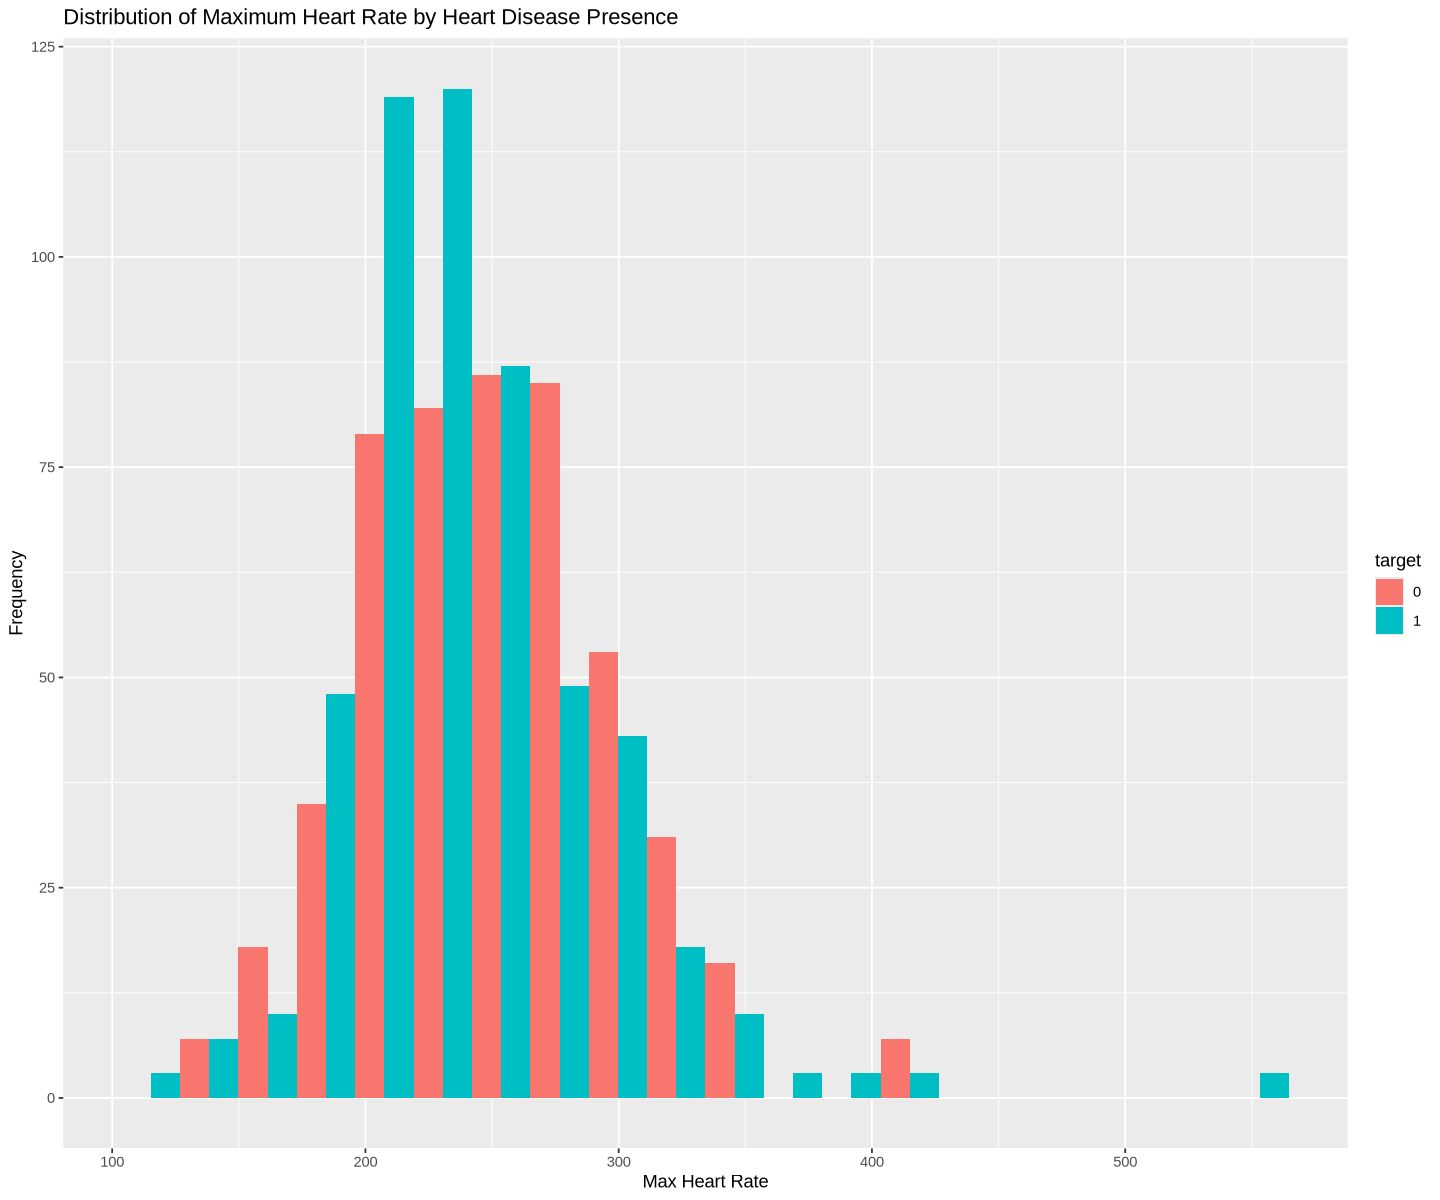

In [19]:
# Main developer: Anna M. 
# Contributor: None


ggplot(heart_data, aes(x = cholesterol, fill = target)) +
geom_histogram(position = "dodge", bins = 20) +
labs(title = "Distribution of Maximum Heart Rate by Heart Disease Presence",
       x = "Max Heart Rate", y = "Frequency")

Based on the histogram above we can imply that cholesterol level is an important indicator of heart disease

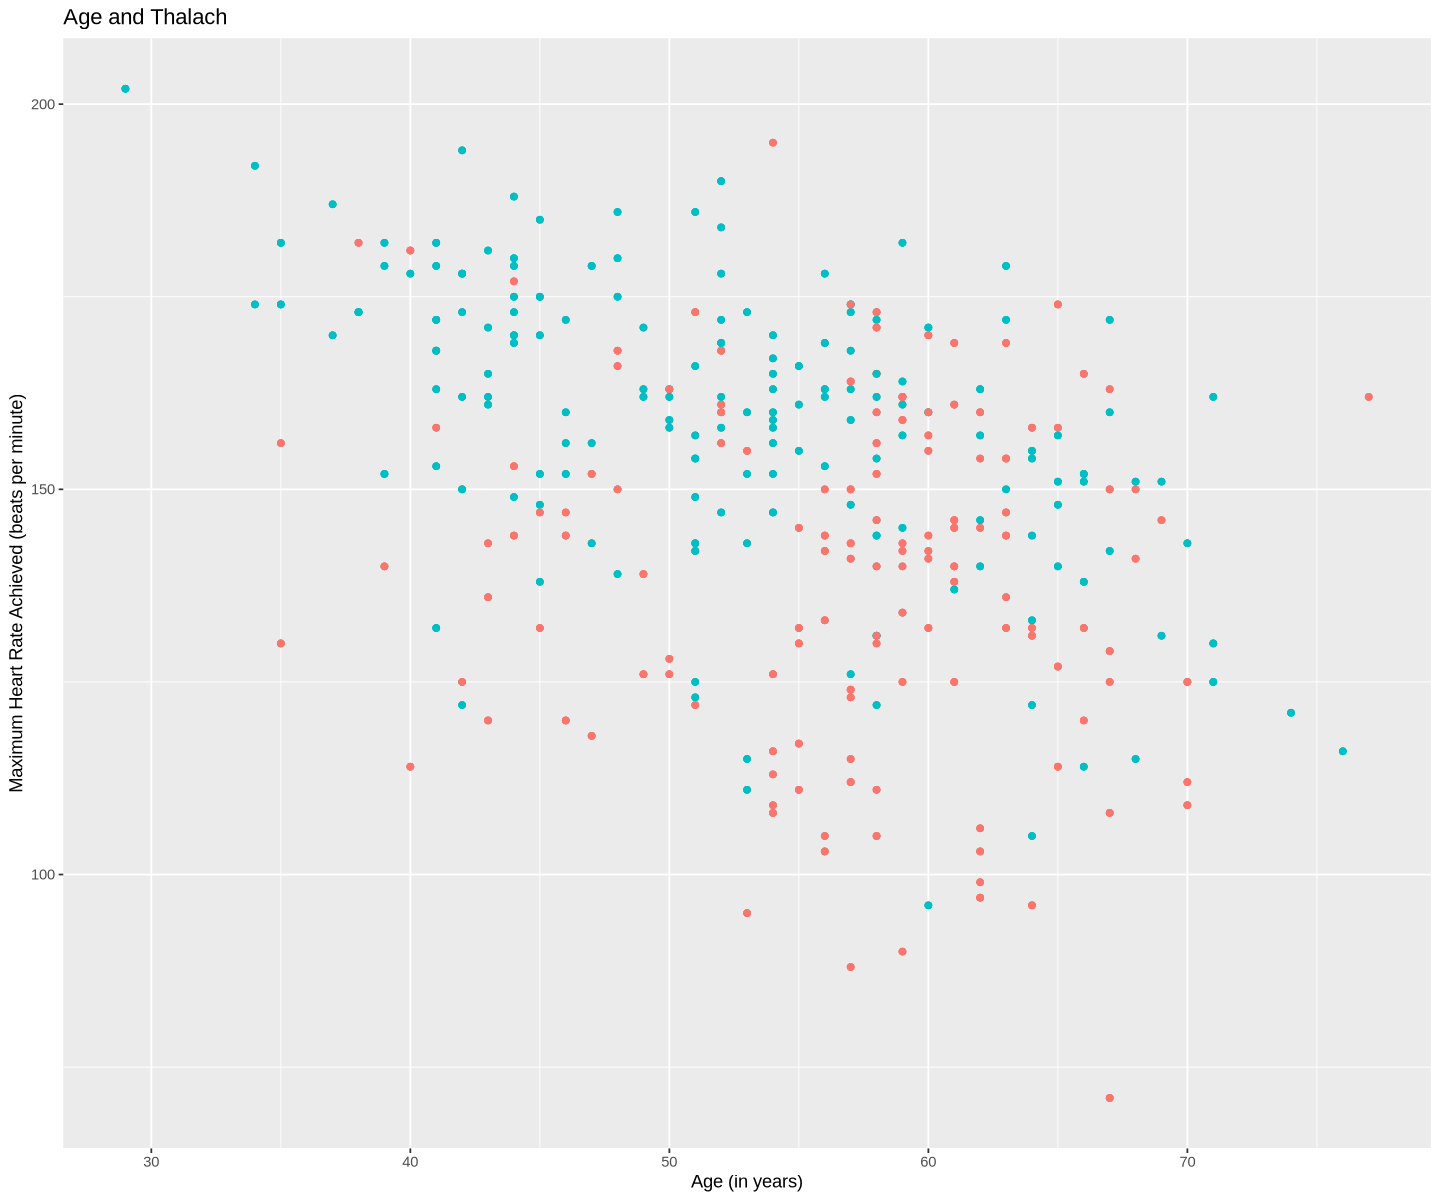

In [27]:
# Main developer: Michelle H.  
# Contributor: None

heart_plot1 <- heart_data |>
  ggplot(aes(x = age, 
             y = max_heart_rate, 
             color = target)) +
  labs(x = "Age (in years)", y = "Maximum Heart Rate Achieved (beats per minute)") +
  theme(legend.position = "none") +
  geom_point() +
  ggtitle("Age and Thalach") 

heart_plot1

This scatterplot explores the relationship between age and maximum heart rate achieved. There is no clear relationship. 

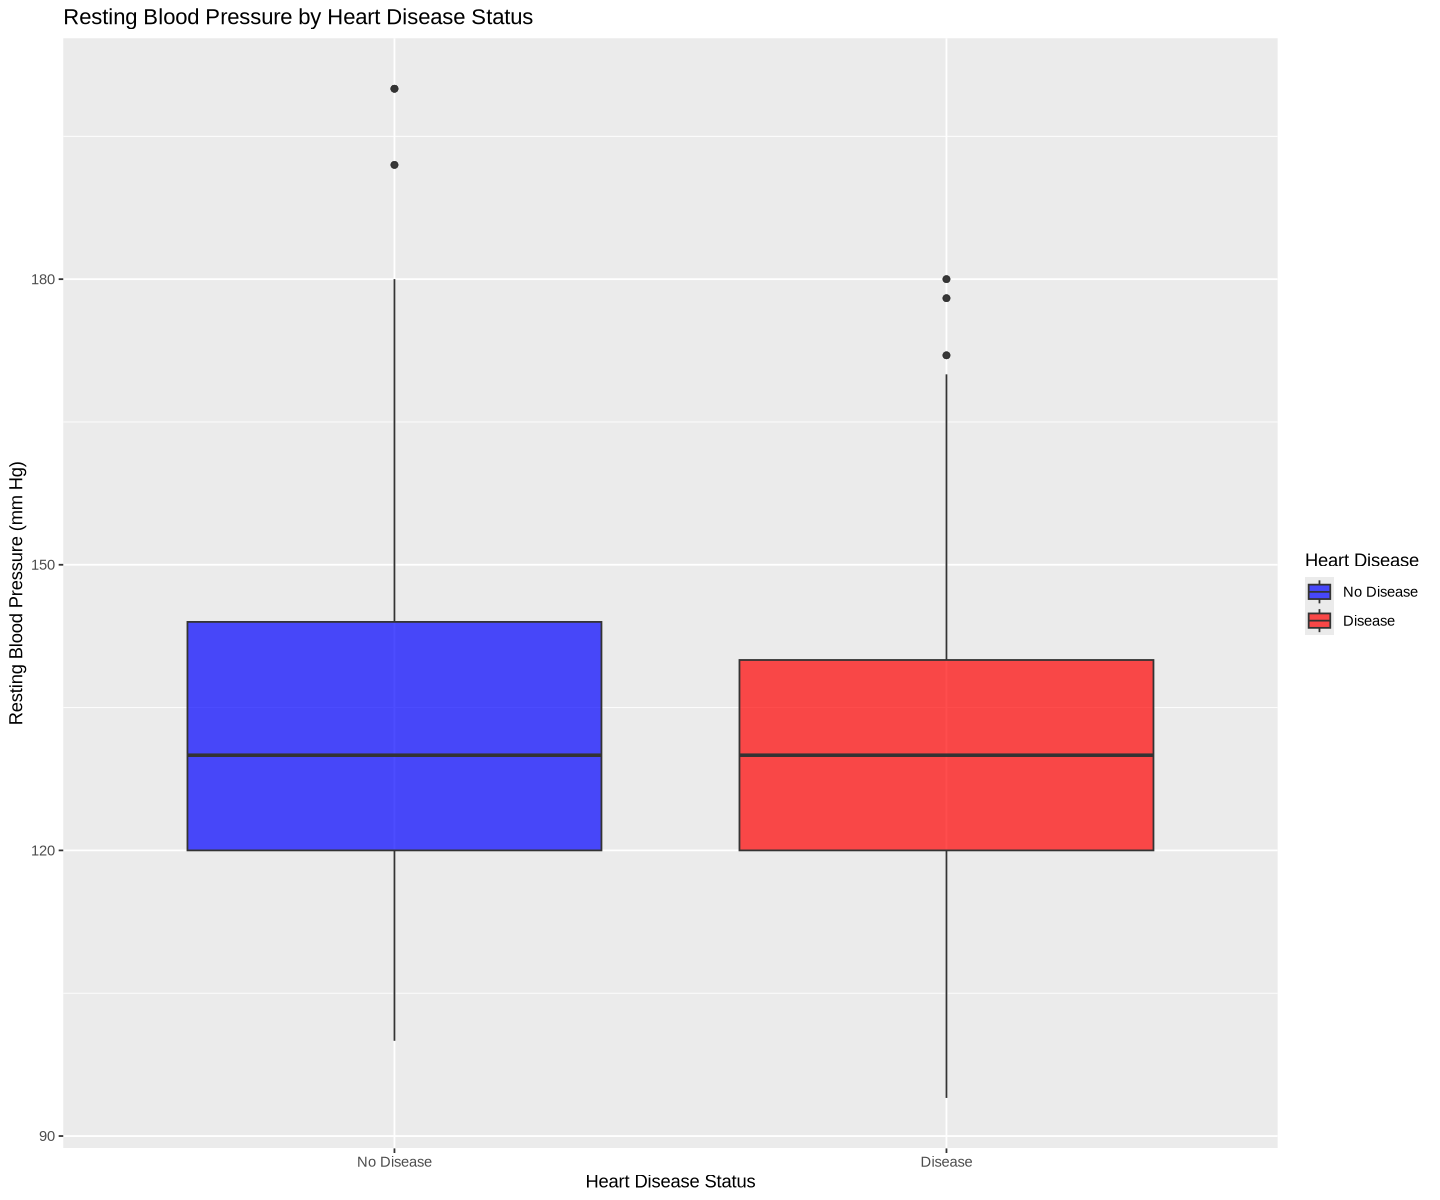

In [26]:
# Main developer: Vaibhav S.
# Contributor: None

# Resting Blood Pressure by Heart Disease Status
ggplot(heart_data, aes(x = factor(target), y = resting_bp, fill = factor(target))) +
  geom_boxplot(alpha = 0.7) +
  scale_fill_manual(values = c("0" = "blue", "1" = "red"), labels = c("No Disease", "Disease")) +
  labs(title = "Resting Blood Pressure by Heart Disease Status", x = "Heart Disease Status", y = "Resting Blood Pressure (mm Hg)", fill = "Heart Disease") +
  scale_x_discrete(labels = c("0" = "No Disease", "1" = "Disease"))

This boxplot visualizes the resting blood pressure (`trestbps`) distribution for patients with and without heart disease.

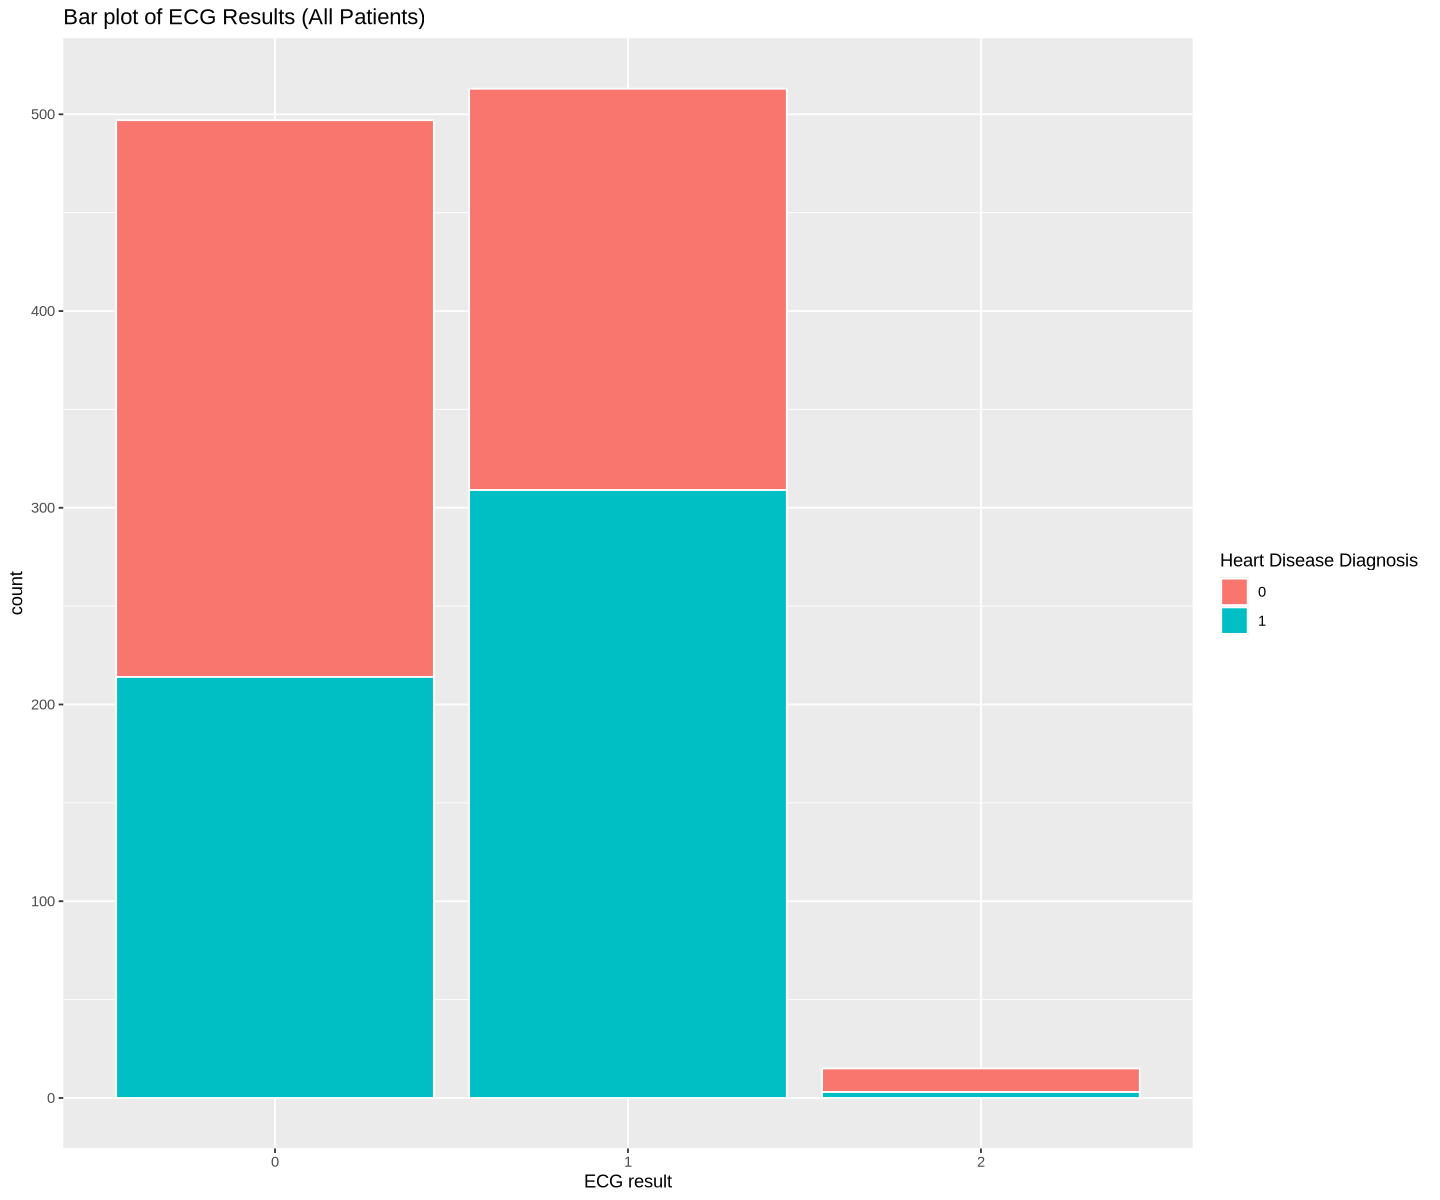

In [31]:
# Main developer: Paul E. 
# Contributor: None

ecg_plot <- ggplot(heart_data, aes(x = resting_ecg)) +
    geom_bar(aes(fill = target), color = "white") +
    labs(x = "ECG result",
         title = "Bar plot of ECG Results (All Patients)") +
    scale_fill_discrete(name = "Heart Disease Diagnosis")
         
ecg_plot

This bar plot visualizes `ECG` to `target`. 

For all the plots, we colored relative to `target`. 

### b) Methods: Plan

In [43]:
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(faraway)
library(broom)
library(leaps)
library(mltools)
library(tidyverse)
library(caret)
library(pROC)
library(boot)
library(glmnet)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘mltools’


The following objects are masked from ‘package:yardstick’:

    mcc, rmse


The following object is masked from ‘package:tidyr’:

    replace_na


Loading required package: lattice


Attaching package: ‘lattice’


The following object is masked from ‘package:faraway’:

    melanoma



Attaching package: ‘caret’


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:purrr’:

    lift


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var



Attaching package: ‘boot’


The following object is masked from ‘package:lattice’:

    melanoma


The following objects are masked from ‘package:faraway’:

    logit, melanoma




In [35]:
set.seed(584)

# Main developer: Paul E. 
# Contributor: None

# splitting data into testing and training set
heart_data <- heart_data %>%
    mutate(ID = row_number())

training_data <- 
    heart_data %>%
    slice_sample(prop = 0.70, replace = FALSE)

selection_data <- 
    heart_data %>%
    anti_join(training_data, by = "ID")

training_data <- 
    training_data %>% 
    select(-"ID")

selection_data <- 
    selection_data %>% 
    select(-"ID")

head(training_data)
nrow(training_data)

head(selection_data)
nrow(selection_data)

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,ST_depression,slope,vessels_num,thal,target
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
2,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0
3,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
4,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
5,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
6,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1


[1] 717

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,ST_depression,slope,vessels_num,thal,target
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
4,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
5,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
6,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


[1] 308

In [38]:
# Main developer: Paul E. 
# Contributor: None

# using backwards selection
backward_sel <- 
    regsubsets(
        x = target ~ ., 
        nvmax = 22,
        data = selection_data,
        method = "backward",
    )

backward_sel_summary <- summary(backward_sel)

backward_sel_summary_df <- tibble(
    n_input_variables = 1:22,
    RSQ = backward_sel_summary$rsq,
    RSS = backward_sel_summary$rss,
    ADJ.R2 = backward_sel_summary$adjr2
)

backward_sel_summary
backward_sel_summary_df

Subset selection object
Call: regsubsets.formula(x = target ~ ., nvmax = 22, data = selection_data, 
    method = "backward", )
22 Variables  (and intercept)
                         Forced in Forced out
age                          FALSE      FALSE
sex1                         FALSE      FALSE
chest_pain_type1             FALSE      FALSE
chest_pain_type2             FALSE      FALSE
chest_pain_type3             FALSE      FALSE
resting_bp                   FALSE      FALSE
cholesterol                  FALSE      FALSE
fasting_blood_sugar1         FALSE      FALSE
resting_ecg1                 FALSE      FALSE
resting_ecg2                 FALSE      FALSE
max_heart_rate               FALSE      FALSE
exercise_induced_angina1     FALSE      FALSE
ST_depression                FALSE      FALSE
slope1                       FALSE      FALSE
slope2                       FALSE      FALSE
vessels_num1                 FALSE      FALSE
vessels_num2                 FALSE      FALSE
vessels_num3  

n_input_variables,RSQ,RSS,ADJ.R2
<int>,<dbl>,<dbl>,<dbl>
1,0.3270270,51.74026,0.3248278
2,0.3715693,48.31571,0.3674485
3,0.4292109,43.88404,0.4235781
4,0.4676706,40.92714,0.4606432
5,0.5093127,37.72557,0.5011887
6,0.5342398,35.80910,0.5249555
7,0.5606360,33.77968,0.5503841
8,0.5703765,33.03080,0.5588815
9,0.5811821,32.20002,0.5685332


In [41]:
# Main developer: Paul E. 
# Contributor: None

# building model based on results of backward selection
backward_sel_model <- glm(target ~ sex + chest_pain_type + resting_bp + cholesterol + resting_ecg + max_heart_rate + ST_depression + slope + vessels_num + thal, 
                           data = training_data, 
                           family = "binomial")

In [44]:
# Main developer: Paul E. 
# Contributor: None

# building the confusion matrix
backward_pred_class <- 
  round(predict(backward_sel_model, type = "response"), 0)

backward_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(backward_pred_class),
    reference = as.factor(training_data$target),
    positive = '1'
)

In [45]:
#same thing, this time for forward selection
foreward_sel <- 
    regsubsets(
        x = target ~ ., 
        nvmax = 22,
        data = selection_data,
        method = "forward",
    )

foreward_sel_summary <- summary(foreward_sel)

foreward_sel_summary_df <- tibble(
    n_input_variables = 1:22,
    RSQ = forward_sel_summary$rsq,
    RSS = forward_sel_summary$rss,
    ADJ.R2 = forward_sel_summary$adjr2
)

foreward_sel_summary
foreward_sel_summary_df

foreward_sel_model <- glm(target ~ age + sex + cp + trestbps + restecg + thalach + exang + oldpeak + slope + ca + thal, 
                           data = training_data, 
                           family = "binomial")

foreward_pred_class <- 
  round(predict(foreward_sel_model, type = "response"), 0)

foreward_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(foreward_pred_class),
    reference = as.factor(training_data$target),
    positive = '1'
)

ERROR: Error: object 'forward_sel_summary' not found
